# Trabajo Práctico: Modelado Comparativo en Minería de Datos (Clasificación)

En este trabajo vamos a analizar un dataset que contiene información sobre hábitos de estudiantes universitarios y su rendimiento académico. El objetivo de este notebook es aplicar técnicas de minería de datos para construir un modelo de clasificación que permita predecir una variable categórica a partir del resto de los datos.

## Importación de librerias

Antes de empezar, importamos todas las librerías que vamos a necesitar para el análisis, la visualización y el modelado.


In [66]:
# Importamos las librerías

import pandas as pd  # para trabajar con datos en forma de tabla
import numpy as np   # para operaciones numéricas

import matplotlib.pyplot as plt  # para hacer gráficos
import seaborn as sns            # para gráficos más completos

from sklearn.preprocessing import StandardScaler, LabelEncoder  # para preparar los datos
from sklearn.model_selection import train_test_split  # para dividir en train y test
from sklearn.decomposition import PCA  # para reducción de dimensionalidad

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Métricas para clasificación
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Selección de variables (opcional según análisis)
from sklearn.feature_selection import SelectKBest, chi2

## Carga del dataset

Trabajamos con un archivo llamado `student_habits_performance.csv`, que contiene información sobre hábitos de estudiantes y su rendimiento académico.

In [67]:
# Cargamos el nuevo archivo CSV (delimitado por comas)
df = pd.read_csv('student_habits_performance_2.csv')

# Mostramos las primeras filas
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4



## Resumen general del dataset

En esta sección presentamos un resumen inicial para entender mejor la estructura y calidad del dataset:

In [68]:
# ========================
# 1. Dimensiones del dataset
# ========================
print("1. Dimensiones del dataset")
print(f"Filas: {df.shape[0]}  |  Columnas: {df.shape[1]}")
print("-" * 50)

# ========================
# 2. Primeras filas del dataset
# ========================
print("2. Primeras filas del dataset")
display(df.head())
print("-" * 50)

# ========================
# 3. Información general del dataset
# ========================
print("3. Información general del dataset")
df.info()
print("-" * 50)



1. Dimensiones del dataset
Filas: 10000  |  Columnas: 16
--------------------------------------------------
2. Primeras filas del dataset


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


--------------------------------------------------
3. Información general del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     10000 non-null  object 
 1   age                            10000 non-null  int64  
 2   gender                         10000 non-null  object 
 3   study_hours_per_day            10000 non-null  float64
 4   social_media_hours             10000 non-null  float64
 5   netflix_hours                  10000 non-null  float64
 6   part_time_job                  10000 non-null  object 
 7   attendance_percentage          10000 non-null  float64
 8   sleep_hours                    10000 non-null  float64
 9   diet_quality                   10000 non-null  object 
 10  exercise_frequency             10000 non-null  int64  
 11  parental_education_le

In [69]:
# ========================
# 4. Valores nulos por columna
# ========================
print("4. Valores nulos por columna")
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]

if not nulls.empty:
    print("Se encontraron columnas con valores nulos:")
    display(pd.DataFrame(nulls, columns=["Valores nulos"]))
else:
    print("No se encontraron valores nulos.")
print("-" * 50)

# ========================
# 5. Filas duplicadas
# ========================
print("5. Filas duplicadas")
print(f"Cantidad de filas duplicadas: {df.duplicated().sum()}")
print("-" * 50)

# ========================
# 6. Categorías únicas por variable categórica
# ========================
print("6. Categorías únicas por cada variable categórica")
for col in df.select_dtypes(include="object").columns:
    print(f"\n {col} ({df[col].nunique()} categorías):")
    print(df[col].value_counts())
    print("-" * 30)

4. Valores nulos por columna
Se encontraron columnas con valores nulos:


,Valores nulos
parental_education_level,952


--------------------------------------------------
5. Filas duplicadas
Cantidad de filas duplicadas: 0
--------------------------------------------------
6. Categorías únicas por cada variable categórica

 student_id (1000 categorías):
student_id
S1725    21
S1775    19
S1072    19
S1890    19
S1038    19
         ..
S1696     3
S1239     3
S1218     3
S1023     2
S1544     2
Name: count, Length: 1000, dtype: int64
------------------------------

 gender (3 categorías):
gender
Male      4908
Female    4660
Other      432
Name: count, dtype: int64
------------------------------

 part_time_job (2 categorías):
part_time_job
No     7832
Yes    2168
Name: count, dtype: int64
------------------------------

 diet_quality (3 categorías):
diet_quality
Fair    4321
Good    3868
Poor    1811
Name: count, dtype: int64
------------------------------

 parental_education_level (3 categorías):
parental_education_level
High School    3929
Bachelor       3463
Master         1656
Name: count, dtype: i

A partir del análisis exploratorio realizado, se obtienen las siguientes observaciones clave:

- **Cantidad de datos:** el dataset cuenta con 10,000 registros y 16 columnas, una cantidad adecuada para aplicar técnicas de clasificación de forma robusta.

- **Tipos de variables:** se identifican variables numéricas (`int64`, `float64`) como `age`, `study_hours_per_day`, `exam_score`, y variables categóricas (`object`) como `gender`, `diet_quality`, `internet_quality`, entre otras. Esta combinación favorece el uso de diferentes tipos de modelos y técnicas de preprocesamiento.

- **Primeras filas:** los datos iniciales presentan valores lógicos y bien distribuidos, sin errores de carga visibles.

- **Valores nulos:** se detectaron 952 valores nulos en la variable `parental_education_level`, representando un 9.5% del total. Este porcentaje es manejable, y se optará por imputarlos con una categoría adicional denominada `"No declarado"` para no eliminar datos ni introducir supuestos artificiales.

- **Filas duplicadas:** no se encontraron registros duplicados en el dataset (`0` filas duplicadas), lo que refleja una buena calidad estructural.

- **Formato general:** los nombres de las columnas son claros y coherentes con los datos que representan. No se identifican errores de formato ni estructuras inconsistentes.

- **Categorías únicas:** se revisaron todas las variables categóricas:
  - `student_id`: contiene 10000 valores únicos (uno por estudiante), por lo tanto, no será útil como predictor y será eliminado.
  - Variables como `gender`, `part_time_job`, `diet_quality`, `internet_quality`, etc., tienen un número reducido de categorías y están listas para ser codificadas posteriormente.

## Tratamiento Inicial de los Datos (Preprocesamiento Básico)

### a) Eliminación de columna no informativa: `student_id`

La columna `student_id` contiene identificadores únicos para cada estudiante y no aporta valor predictivo al modelo. Al tratarse de una variable sin relación directa con el rendimiento académico, se procede a eliminarla del dataset.

In [70]:
df.drop(columns=["student_id"], inplace=True)

### b) Imputación de valores nulos

Se detectaron valores nulos en la variable `parental_education_level`, que representa el nivel educativo de los padres. Para evitar eliminar registros, se imputan estos valores con una nueva categoría `"No declarado"`, dejando explícito que dicha información no fue proporcionada.


In [71]:
# Imputar valores nulos en parental_education_level
df["parental_education_level"] = df["parental_education_level"].fillna("No declarado")

### c) Transformación de la variable objetivo

Como se trabajará con modelos de clasificación, se transforma la variable continua `exam_score` en una variable categórica denominada `exam_performance`, con tres clases:

- **Bajo**: score < 50  
- **Medio**: 50 ≤ score < 80  
- **Alto**: score ≥ 80

Esta nueva variable será la que intentaremos predecir mediante distintos modelos de clasificación.

In [75]:
# Crear variable categórica de clasificación: exam_performance
def clasificar_rendimiento(score):
    if score < 50:
        return "Bajo"
    elif score < 80:
        return "Medio"
    else:
        return "Alto"

df["exam_performance"] = df["exam_score"].apply(clasificar_rendimiento)

## Dataset Preprocesado

In [73]:
# ========================
# Revisión del Dataset Preprocesado
# ========================

# 1. Dimensiones del dataset actualizado
print("1. Dimensiones del dataset (post-tratamiento)")
print(f"Filas: {df.shape[0]}  |  Columnas: {df.shape[1]}")
print("-" * 50)

# 2. Primeras filas
print("2. Primeras filas del dataset actualizado")
display(df.head())
print("-" * 50)

# 3. Información general
print("3. Tipos de datos y no-nulos")
df.info()
print("-" * 50)



1. Dimensiones del dataset (post-tratamiento)
Filas: 10000  |  Columnas: 16
--------------------------------------------------
2. Primeras filas del dataset actualizado


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,exam_performance
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,Medio
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,Alto
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,Bajo
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,Bajo
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,Medio


--------------------------------------------------
3. Tipos de datos y no-nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            10000 non-null  int64  
 1   gender                         10000 non-null  object 
 2   study_hours_per_day            10000 non-null  float64
 3   social_media_hours             10000 non-null  float64
 4   netflix_hours                  10000 non-null  float64
 5   part_time_job                  10000 non-null  object 
 6   attendance_percentage          10000 non-null  float64
 7   sleep_hours                    10000 non-null  float64
 8   diet_quality                   10000 non-null  object 
 9   exercise_frequency             10000 non-null  int64  
 10  parental_education_level       10000 non-null  object 
 11  internet_quality           

In [76]:
# 4. Verificar valores nulos
print("4. Valores nulos restantes por columna")
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]
if not nulls.empty:
    print("No Se encontraron columnas con valores nulos:")
    display(pd.DataFrame(nulls, columns=["Valores nulos"]))
else:
    print("No se encontraron valores nulos.")
print("-" * 50)

# 5. Verificar existencia de exam_performance
print("5. Verificación de la variable objetivo 'exam_performance'")
print(df["exam_performance"].value_counts())
print("-" * 50)

# 6. Categorías únicas por cada variable categórica
print("6. Categorías únicas por variable categórica (actualizado)")
for col in df.select_dtypes(include="object").columns:
    print(f"\n {col} ({df[col].nunique()} categorías):")
    print(df[col].value_counts())
    print("-" * 30)

4. Valores nulos restantes por columna
No se encontraron valores nulos.
--------------------------------------------------
5. Verificación de la variable objetivo 'exam_performance'
exam_performance
Medio    5945
Alto     2740
Bajo     1315
Name: count, dtype: int64
--------------------------------------------------
6. Categorías únicas por variable categórica (actualizado)

 gender (3 categorías):
gender
Male      4908
Female    4660
Other      432
Name: count, dtype: int64
------------------------------

 part_time_job (2 categorías):
part_time_job
No     7832
Yes    2168
Name: count, dtype: int64
------------------------------

 diet_quality (3 categorías):
diet_quality
Fair    4321
Good    3868
Poor    1811
Name: count, dtype: int64
------------------------------

 parental_education_level (4 categorías):
parental_education_level
High School     3929
Bachelor        3463
Master          1656
No declarado     952
Name: count, dtype: int64
------------------------------

 internet_qu

### Revisión del Dataset Preprocesado

Después de aplicar el preprocesamiento inicial, se realizó una nueva inspección general del dataset con los siguientes resultados:

---

- **Dimensiones del dataset:**  
  El conjunto de datos contiene **10,000 registros** y **16 columnas**, incluyendo la nueva variable objetivo `exam_performance`.

---

- **Tipos de datos y estructura:**  
  El dataset está completamente libre de valores nulos. Todas las columnas tienen el tipo de dato apropiado:
  - 6 columnas numéricas flotantes (`float64`)
  - 3 columnas numéricas enteras (`int64`)
  - 7 columnas categóricas (`object`)

---

- **Valores nulos restantes:**  
   **No se encontraron valores nulos** en ninguna columna después del tratamiento.

---

- **Distribución de la variable objetivo `exam_performance`:**  
  Esta variable categórica se creó a partir de `exam_score` y tiene la siguiente distribución:

  - **Medio:** 5945 estudiantes (59.5%)
  - **Alto:** 2740 estudiantes (27.4%)
  - **Bajo:** 1315 estudiantes (13.1%)

  Esta distribución es moderadamente desbalanceada pero aún válida para clasificación. Se pueden considerar estrategias de balanceo si el rendimiento lo requiere.

---

- **Revisión de variables categóricas:**  
  Se analizó la distribución de valores en las variables categóricas más importantes:

  - **`gender` (3 categorías):**
    - `Male`: 4908 estudiantes
    - `Female`: 4660 estudiantes
    - `Other`: 432 estudiantes  
    > La categoría `"Other"` incluye personas que no se identifican exclusivamente como masculino o femenino. Representa el 4.3% del total.

  - **`part_time_job` (2 categorías):**
    - `No`: 7832 estudiantes (78.3%)
    - `Yes`: 2168 estudiantes (21.7%)  
    > Esta variable puede tener un impacto en el rendimiento académico, dependiendo de cómo los estudiantes equilibren el trabajo con los estudios.

---

Estas verificaciones confirman que el dataset está en condiciones óptimas para continuar con el análisis exploratorio visual y el modelado.

## 1. Descripción del Problema

En este trabajo abordamos un problema de clasificación utilizando un dataset que recopila información sobre estudiantes universitarios, sus hábitos, condiciones personales y estilos de vida. El propósito del análisis es predecir una categoría de rendimiento académico a partir de esas variables.

---

### Resumen del Dataset

El conjunto de datos contiene 10,000 registros y 16 columnas. Incluye variables numéricas (como horas de estudio, sueño y asistencia) y categóricas (como género, calidad de dieta, tipo de conexión a internet, entre otras).  
La variable original `exam_score` fue transformada en una variable categórica llamada `exam_performance`, con tres clases: **Bajo**, **Medio** y **Alto**.

---

### Objetivo del Análisis

El objetivo es construir modelos de clasificación que permitan predecir el nivel de rendimiento académico (`exam_performance`) de los estudiantes. Esto implica clasificar a cada estudiante en una de tres categorías en función de sus características personales y hábitos.

---

### Justificación del Dataset

Este dataset es adecuado para aplicar técnicas de clasificación por los siguientes motivos:

- La variable objetivo ha sido categorizada en tres clases balanceadas de forma razonable.
- Incluye tanto variables numéricas como categóricas, lo que permite evaluar distintos tipos de modelos de clasificación.
- No contiene valores nulos ni duplicados tras el preprocesamiento.
- La cantidad de observaciones (10,000 registros) permite construir, entrenar y validar modelos con consistencia.

---

En las secciones siguientes se explorarán distintas técnicas de clasificación, y se evaluará su rendimiento utilizando métricas como accuracy, matriz de confusión y reporte de clasificación.

## 2. Análisis Exploratorio de Datos (EDA)

### 2.1 Estadísticas descriptivas generales

Se analiza un resumen estadístico de las variables numéricas del dataset, junto con el conteo de categorías presentes en las variables cualitativas.

In [80]:
# Resumen de variables numéricas
df.describe().style\
    .set_caption("Estadísticas Descriptivas de Variables Numéricas")\
    .background_gradient(cmap='BuGn')\
    .format(precision=2)

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,20.50,3.54,2.52,1.84,83.88,6.48,3.03,5.43,69.50
std,2.33,1.45,1.16,1.04,9.20,1.21,2.05,2.88,16.69
min,12.00,0.00,0.00,0.00,56.00,3.20,-4.00,-4.00,18.40
25%,19.00,2.55,1.72,1.08,77.62,5.67,2.00,3.00,58.31
50%,21.00,3.55,2.51,1.80,84.25,6.49,3.00,5.00,70.10
75%,22.00,4.50,3.30,2.55,90.64,7.30,4.00,7.00,81.14
max,30.00,8.30,7.20,5.40,100.00,10.00,11.00,16.00,100.00


Este resumen estadístico permite observar la escala y dispersión de las variables numéricas en el dataset. Podemos ver que las medias, medianas y rangos son razonables, y que no existen valores extremos evidentes que requieran corrección inmediata.

### 2.2 Distribución de la variable objetivo `exam_performance`

La variable objetivo `exam_performance` fue generada a partir de `exam_score` y representa tres niveles de rendimiento: **Bajo**, **Medio** y **Alto**.  
Se analiza su distribución para verificar el equilibrio entre clases.

C:\Users\LORENA SIERRA\AppData\Local\Temp\ipykernel_13368\352174069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="exam_performance", palette="BuGn_r")


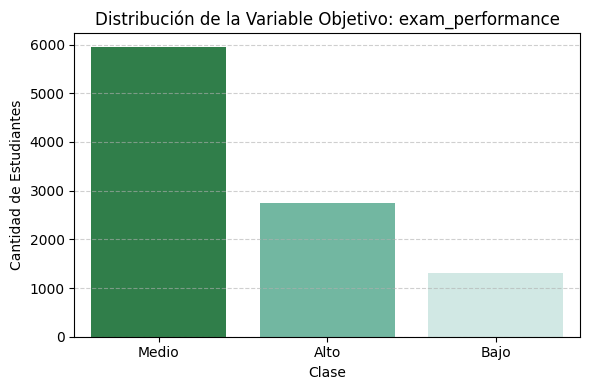

,Cantidad,Porcentaje (%)
exam_performance,,
Medio,5945,59.45
Alto,2740,27.40
Bajo,1315,13.15


In [79]:
# Conteo de clases
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="exam_performance", palette="BuGn_r")
plt.title("Distribución de la Variable Objetivo: exam_performance")
plt.xlabel("Clase")
plt.ylabel("Cantidad de Estudiantes")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Tabla con conteo y porcentaje
target_counts = df["exam_performance"].value_counts()
target_percent = round(df["exam_performance"].value_counts(normalize=True) * 100, 2)

summary_df = pd.DataFrame({
    "Cantidad": target_counts,
    "Porcentaje (%)": target_percent
})

summary_df.style.set_caption(" Distribución de Clases en 'exam_performance'")\
    .background_gradient(cmap='BuGn')\
    .format(precision=2)


 **Análisis**
 
La distribución de clases en la variable exam_performance muestra un predominio de la clase "Medio", seguido por "Alto" y "Bajo". Aunque hay cierto desbalance, especialmente con la clase "Bajo", el dataset sigue siendo utilizable sin necesidad inmediata de técnicas de balanceo.

La tabla confirma visualmente la distribución observada en el gráfico. Se puede considerar el uso de métricas como f1-score o estrategias como SMOTE si el rendimiento en modelos se ve afectado por este desbalance.

### 2.3 Visualización de distribuciones de variables

Se analizan las distribuciones de las variables predictoras numéricas mediante histogramas, con el fin de identificar sesgos, asimetrías y posibles valores atípicos. Estas visualizaciones también ayudan a comprender cómo están distribuidos los datos que alimentarán los modelos de clasificación.

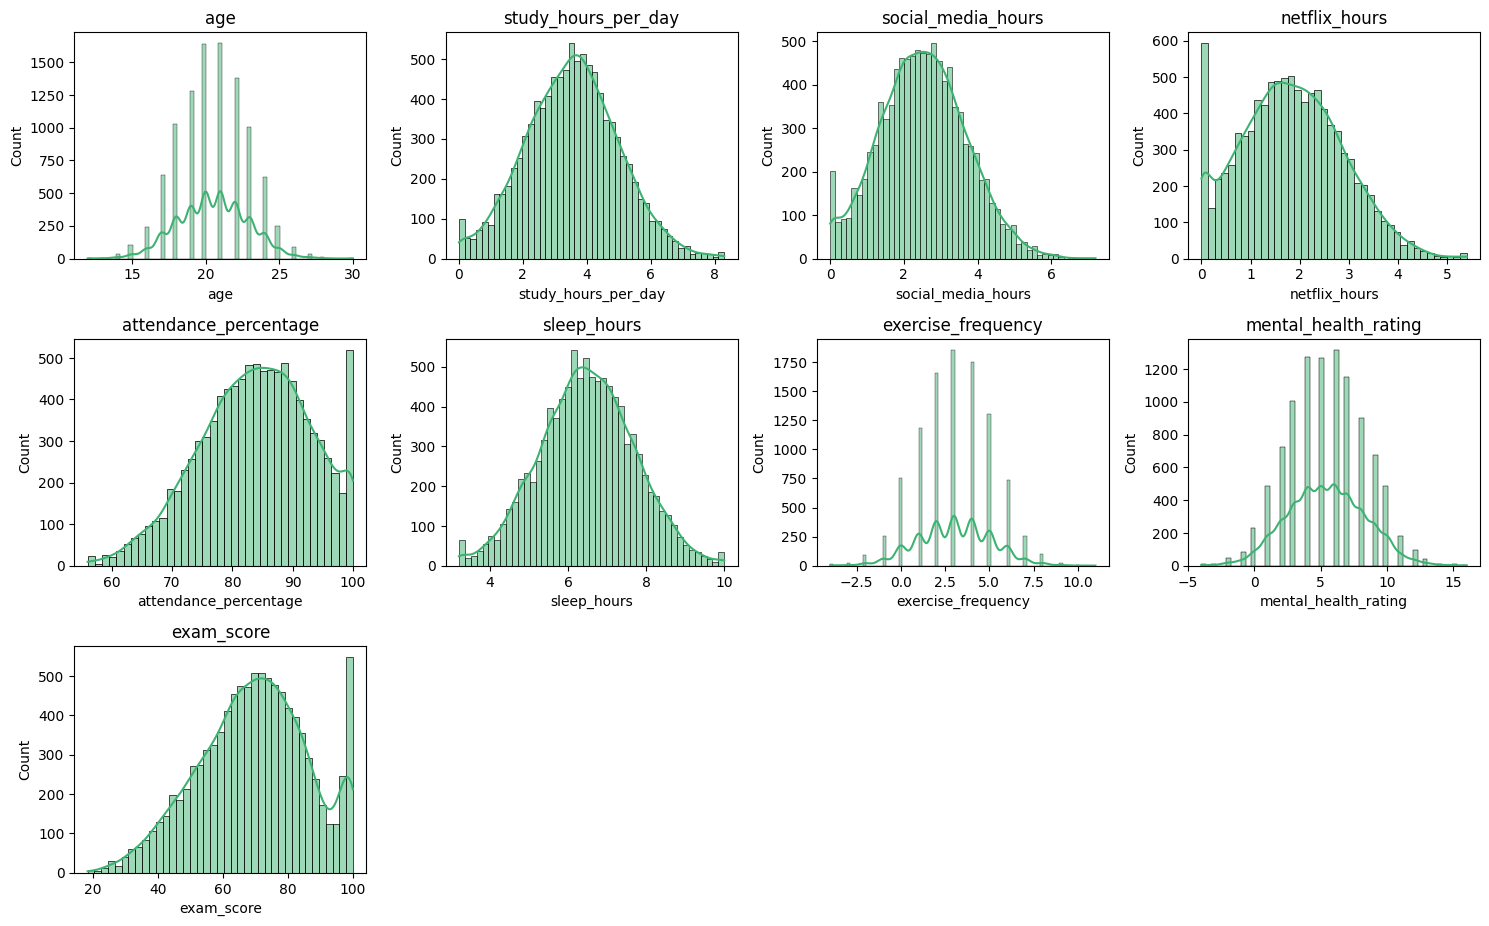

In [81]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Histograma de todas las variables numéricas
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=col, kde=True, color="mediumseagreen")
    plt.title(col)
    plt.tight_layout()

 **Análisis de distribuciones**  
Se muestran las distribuciones de las variables numéricas que serán usadas para predecir `exam_performance`. Se destacan los siguientes aspectos:

- **Variables como `age` y `sleep_hours`** están distribuidas de forma razonablemente simétrica, lo que facilita su uso en modelos lineales o árboles.
- **Asimetría**: Variables como `social_media_hours`, `netflix_hours` y `study_hours_per_day` están sesgadas positivamente. Esto podría afectar a algunos modelos sensibles a la escala y normalidad.
- **`exercise_frequency`** tiene una forma claramente discreta, lo cual será tenido en cuenta en la codificación.
- Estas distribuciones permitirán comparar si los distintos niveles de rendimiento (`Bajo`, `Medio`, `Alto`) tienen relaciones particulares con los predictores. Esto se complementará luego con análisis por clase (boxplots).

El análisis exploratorio confirma que las variables tienen comportamiento diverso y por tanto requieren preprocesamiento cuidadoso para los modelos de clasificación.

### 2.4 Detección de valores atípicos (Clasificación)

Se utilizan boxplots para detectar posibles valores atípicos en las variables numéricas. Estas observaciones extremas pueden afectar el rendimiento de ciertos modelos, especialmente aquellos sensibles a la escala y distribución como la regresión logística o KNN.

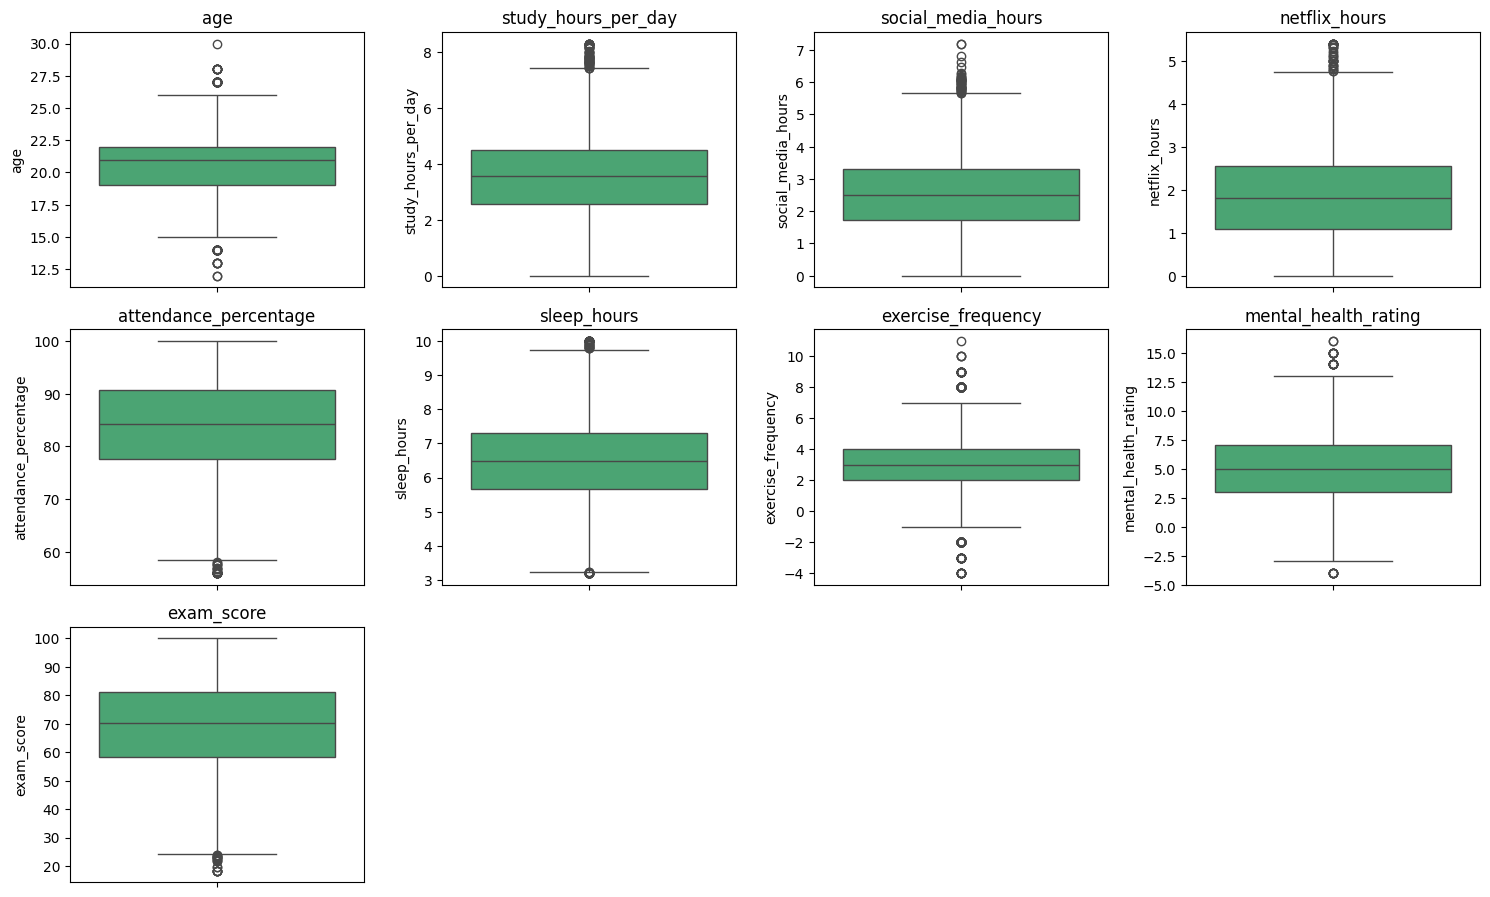

In [82]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=col, color="mediumseagreen")
    plt.title(col)
    plt.tight_layout()

 **Análisis**
 
La forma de los boxplots es similar al caso de regresión, ya que se comparten las mismas variables.

Aquí nos sirven para detectar valores extremos que podrían desbalancear clases en exam_performance.

También indican posibles puntos de corte útiles para generar nuevas variables categóricas o binarizaciones (si se desea).

### 2.5 Correlación entre variables (Clasificación)

Se utiliza una matriz de correlación para identificar relaciones entre las variables numéricas del dataset. Esto permite detectar redundancias o dependencias que pueden afectar el rendimiento del modelo y ayudan a reducir la dimensionalidad si es necesario.

C:\Users\LORENA SIERRA\AppData\Local\Temp\ipykernel_13368\1146707614.py:6: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\LORENA SIERRA\OneDrive\Desktop\GITHUB\MODELIZADO\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


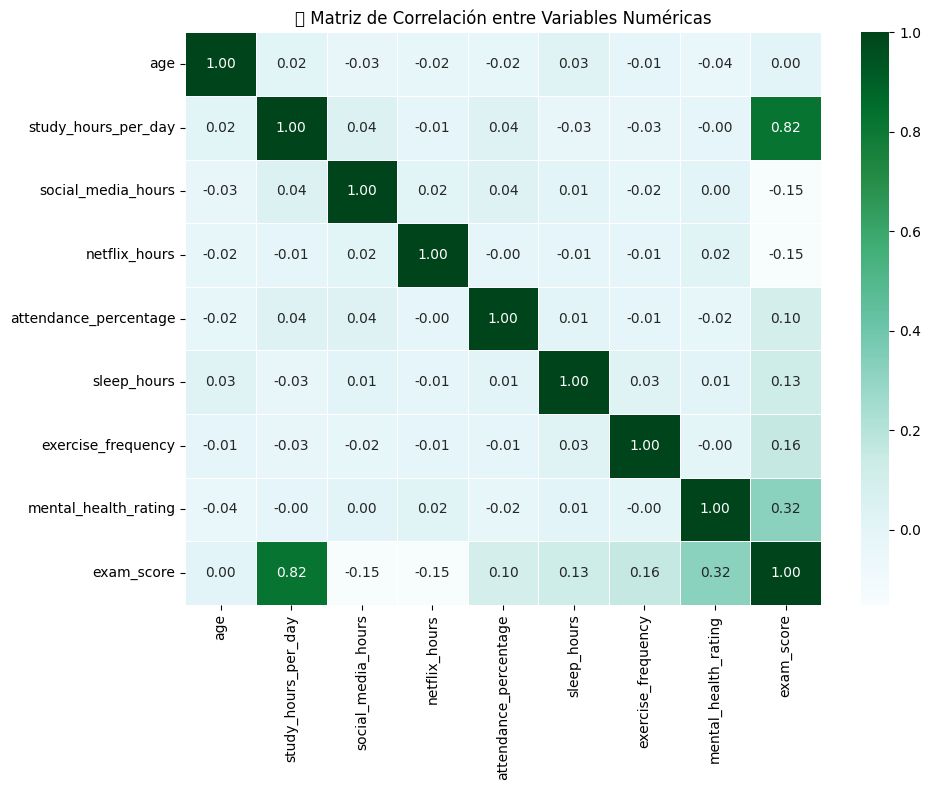

In [83]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=["float64", "int64"]).corr()

sns.heatmap(corr, annot=True, cmap="BuGn", fmt=".2f", linewidths=0.5)
plt.title("🔗 Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()

 **Análisis**
 
La correlación se interpreta igual que en regresión, pero aquí se busca entender qué variables tienen más relación con la clase.

study_hours_per_day y mental_health_rating tienen asociación positiva con el rendimiento académico.

Este análisis orienta qué variables serán más relevantes al codificarlas para modelos como Árboles, Random Forest o Regresión Logística.

### 2.6 – Visualización de la Matriz de Dispersión por Clase (Clasificación)
Esta visualización permite observar la relación entre variables numéricas según las clases de la variable objetivo exam_performance. Es útil para detectar patrones, agrupaciones o separaciones que podrían ser captadas por modelos de clasificación.

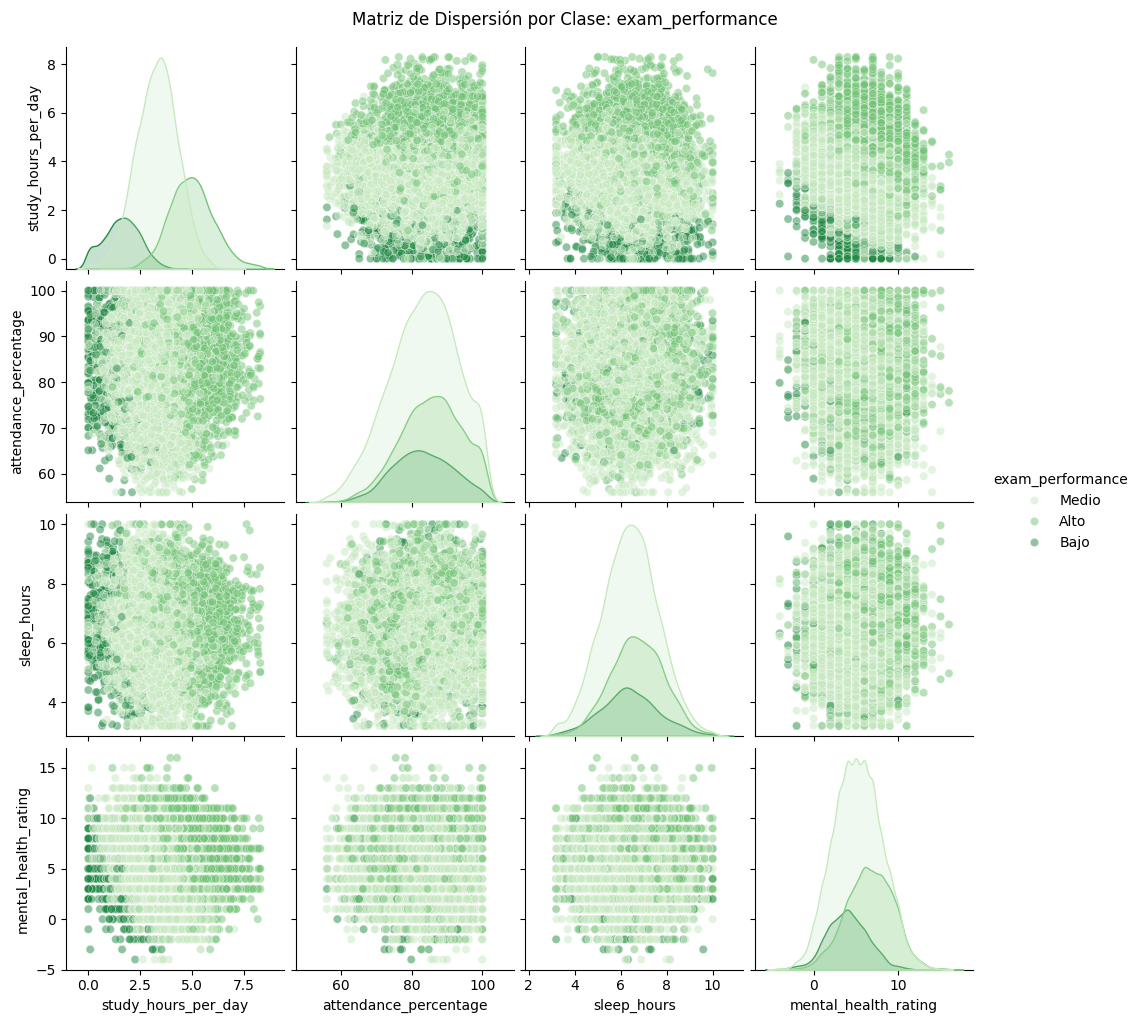

In [84]:
# Matriz de dispersión por clase
sns.pairplot(df,
             vars=["study_hours_per_day", "attendance_percentage", "sleep_hours", "mental_health_rating"],
             hue="exam_performance",
             palette="Greens",  # verde para clasificación
             diag_kind="kde",
             plot_kws={'alpha': 0.5})
plt.suptitle("Matriz de Dispersión por Clase: exam_performance", y=1.02)
plt.show()

 **Análisis**

La matriz de dispersión nos permite examinar cómo se distribuyen los estudiantes según su clase de rendimiento académico (Bajo, Medio, Alto) en función de variables numéricas seleccionadas.

study_hours_per_day y attendance_percentage: Se observa que los estudiantes con mejor rendimiento (clase Alto) tienden a agruparse en valores más elevados de horas de estudio y porcentaje de asistencia, lo que sugiere una relación positiva con el desempeño académico.

sleep_hours: Existe una ligera tendencia a que los alumnos con calificaciones más altas mantengan un promedio de sueño más estable, aunque la diferencia entre clases no es tan marcada como en otras variables.

mental_health_rating: Se percibe un patrón donde los estudiantes de mayor rendimiento tienden a reportar mejores calificaciones de salud mental, aunque también existen muchos casos de rendimiento medio con salud mental baja.



###  2.7 Limpieza y Calidad del Dataset

Durante el preprocesamiento y el análisis exploratorio, se llevaron a cabo distintas tareas para asegurar la calidad y consistencia de los datos:

- **Valores nulos:**  
  Se identificaron valores faltantes en la variable `parental_education_level`, los cuales fueron imputados con la categoría `"No declarado"`. Posteriormente, se confirmó que no quedaron valores nulos en el dataset.

- **Valores duplicados:**  
  Se realizó una verificación de duplicados y se comprobó que no existen registros repetidos en el dataset.

- **Variables atípicas:**  
  Mediante boxplots (punto 2.4), se identificaron valores atípicos en variables como `exercise_frequency` o `mental_health_rating`. Sin embargo, no se eliminaron estos registros ya que se consideran observaciones plausibles dentro del fenómeno estudiado.

- **Tipos de datos y formato:**  
  Todas las columnas tienen un tipo de dato coherente con su naturaleza (numéricas o categóricas), y no se detectaron errores de formato o inconsistencias semánticas.

>  **Conclusión:** el dataset de clasificación se encuentra **limpio, consistente y listo para el modelado**.
